# <center>Spread Locater a Statistical Distribution Analysis Model</center>

### Part A - Theoretical Foundation (Short Notes & Explanation):
Write a detailed note covering:
1. What is Statistical Distributions?
2. What is a Q-Q Plot and why is it used?
3. Difference between Discrete and Continuous Distributions.
4. What is Bernoulli Distribution?
5. What is Binomial Distribution?
6. Explain Log-Normal Distribution.
7. Explain Power Law Distribution.
8. What is Box-Cox Transform?
9. Explain Poisson Distribution with an example.
10. What is Z-score Probability?
11. Differentiate Probability Density Function (PDF) and Cumulative Distribution Function (CDF).

<center> answers in pdf</center>

# 📊 E-Commerce Transaction Statistical Analysis

## Part B – Distribution Modeling & Statistical Testing

## 👤 Name: Maitrak Kunjadiya  
## 📚 Course: Statistical Analysis / Data Science   

---

## 📌 Project Objective

The goal of this project is to analyze e-commerce transaction data 
using probability distributions and statistical modeling techniques.

We will:

- Model transaction success using Bernoulli distribution
- Model weekly transactions using Binomial distribution
- Model daily transactions using Poisson distribution
- Analyze transaction amounts using Log-Normal and Pareto distributions
- Test normality using Q-Q plot
- Apply Box-Cox transformation
- Compute Z-scores and probabilities

---
# 1️⃣ Importing Required Libraries
---

In [139]:
import pandas as pd 
import numpy as np 
from  scipy.stats import bernoulli,binom
import seaborn as sns
import matplotlib.pyplot as plt 


---
# 2️⃣ Loading and Preparing Dataset
---

In [140]:
# Load the Dataset
ecommerce_transactions = pd.read_csv("ecommerce_transactions.csv")
print(ecommerce_transactions.head())

ecommerce_transactions["transaction_date"] = pd.to_datetime(ecommerce_transactions["transaction_date"])


                         transaction_id customer_id  transaction_amount  \
0  e98aa092-3770-4fdb-9502-5b5a6a244811    CUST2824             3821.34   
1  11ba6918-dba0-41e5-96cf-f5a7b95f0103    CUST1409             2781.84   
2  82b7654b-6eb7-4579-89a0-1a9edec0a7bb    CUST5506             4120.97   
3  f7166574-f400-4d53-b526-0b11f6619ddf    CUST5012             6383.78   
4  8632fe26-b507-4068-9c68-1b2fa04fecb3    CUST4657             2651.61   

  transaction_date  transaction_count region transaction_status  
0       2023-01-26                  3  North               Fail  
1       2023-01-28                  0   East               Fail  
2       2023-01-28                  0  South               Fail  
3       2023-01-18                  2  South            Success  
4       2023-01-04                  4  North            Success  


---
# 3️⃣ Bernoulli Distribution – Transaction Success
---
### 📌 Objective:
To estimate probability of a successful transaction.

In [141]:
# fit to bernoulli distribution of transaction status
p_success = (ecommerce_transactions["transaction_status"] == "Success").mean()
print(p_success)

p_Fail = (ecommerce_transactions["transaction_status"] == "Fail").mean()
print(p_Fail)

x_success = 1
x_failure = 0

bernoulli_success = bernoulli.pmf(1,p_success)
print(f"bernoulli probability of success:-{bernoulli_success:.2f}")
bernoulli_failure = bernoulli.pmf(0,p_success)
print(f"bernoulli probability of failure:-{bernoulli_failure:.2f}")


0.44545454545454544
0.5545454545454546
bernoulli probability of success:-0.45
bernoulli probability of failure:-0.55


### Hence there is 45% chance that the Transaction status is successfull.

### 📊 Interpretation

The estimated probability of transaction success is approximately **45%**.

This confirms that each transaction behaves like a Bernoulli trial 
with two possible outcomes: Success or Failure.

---
# 4️⃣ Binomial Distribution – Weekly Transactions per Customer
---
### 📌 Objective:
To model number of transactions in a fixed time period.

     binomial_of_transaction_count
0                         0.292568
1                         0.016127
2                         0.016127
3                         0.218530
4                         0.235014
..                             ...
215                       0.218530
216                       0.030329
217                       0.090683
218                       0.292568
219                       0.090683

[220 rows x 1 columns]


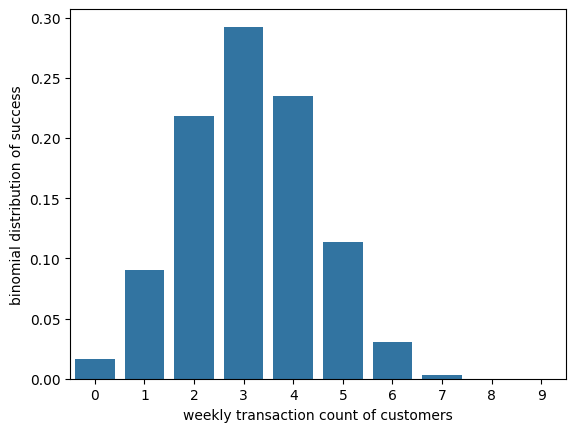

In [142]:
# fit to binomial distribution of transcation count

n = 7
p = p_success
k = ecommerce_transactions["transaction_count"].values

binomial_distribution = binom.pmf(k,n,p)

binomial_distribution_df = pd.DataFrame({"binomial_of_transaction_count":binomial_distribution})
print(binomial_distribution_df)

sns.barplot(x=ecommerce_transactions["transaction_count"],y=binomial_distribution_df["binomial_of_transaction_count"])
plt.xlabel("weekly transaction count of customers")
plt.ylabel("binomial distribution of success")
plt.show()

---
# 5️⃣ Poisson Distribution – Daily Transaction Count
---
### 📌 Objective:
To analyze random transaction arrivals per day.

date_only
2023-01-01     6
2023-01-02    12
2023-01-03    10
2023-01-04     7
2023-01-05     9
Name: transaction_id, dtype: int64
7.10


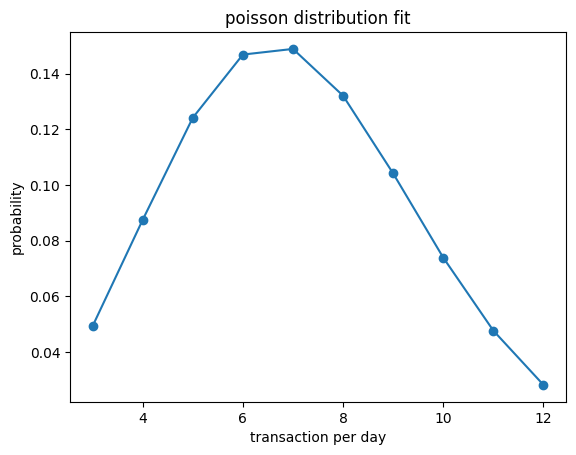

In [143]:
#fit to poisson distribution (daily transaction count)
import datetime as datetime
ecommerce_transactions["date_only"] = ecommerce_transactions["transaction_date"].dt.date

daily_counts = ecommerce_transactions.groupby("date_only")["transaction_id"].count()
print(daily_counts.head())

lambda_poisson = daily_counts.mean()
print(f"{lambda_poisson:.2f}")

from scipy.stats import poisson
x = np.arange(daily_counts.min(),daily_counts.max()+1)
plt.plot(x, poisson.pmf(x,lambda_poisson),marker="o")
plt.xlabel("transaction per day")
plt.ylabel("probability")
plt.title("poisson distribution fit")
plt.show()


### 📊 Interpretation

The average number of daily transactions (λ) represents 
the expected number of transactions per day.

The histogram and Poisson curve alignment indicates that 
daily transactions follow a random arrival process.

---
# 6️⃣ Log-Normal Distribution – Transaction Amount
---
### 📌 Objective:
To check if transaction amounts are positively skewed.

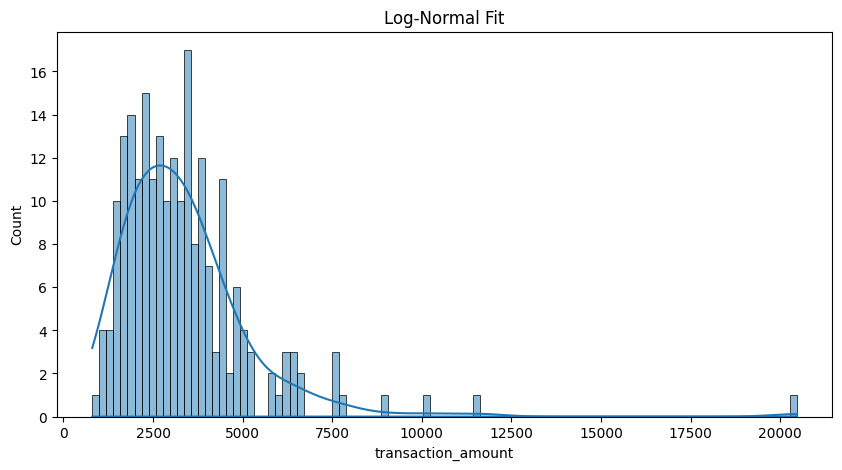

In [144]:
from scipy.stats import lognorm,pareto,probplot
amounts = ecommerce_transactions['transaction_amount']

shape, loc, scale = lognorm.fit(amounts, floc=0)

x = np.linspace(amounts.min(), amounts.max(), 220)

plt.figure(figsize=(10,5))
sns.histplot(amounts, bins=100,kde=True)
plt.plot(x, lognorm.pdf(x, shape, loc, scale))
plt.title("Log-Normal Fit")
plt.show()

---
# 7️⃣ Pareto (Power Law) Distribution
---
### 📌 Objective:
To detect heavy-tailed behavior in transaction amounts.

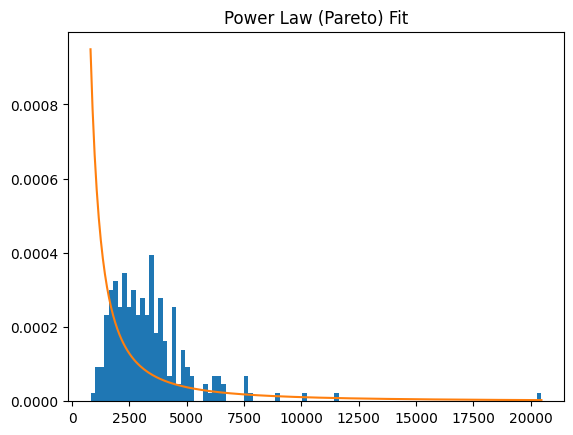

In [145]:
# pareto fit

pareto_parameters = pareto.fit(amounts, floc=0)

plt.figure()
plt.hist(amounts, bins=100, density=True)
plt.plot(x, pareto.pdf(x, *pareto_parameters))
plt.title("Power Law (Pareto) Fit")
plt.show()

### 📊 Interpretation

The transaction amounts are clearly right-skewed.

This indicates:
- Most transactions are small/moderate
- Few transactions are very large

This confirms heavy-tailed behavior.

---
# 8️⃣ Q-Q Plot – Normality Test
---
### 📌 Objective:
To visually test if transaction amounts follow Normal distribution.

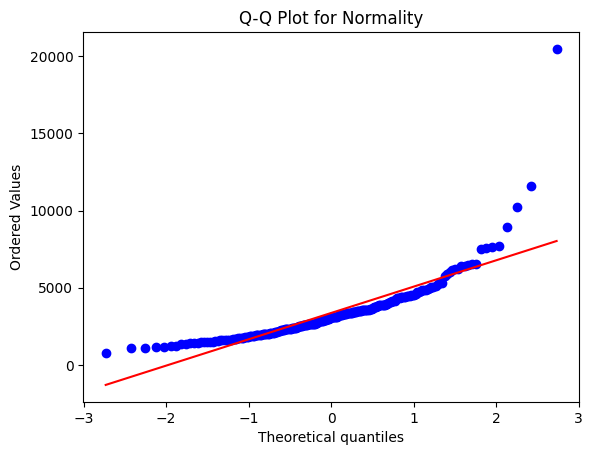

In [146]:
plt.figure()
probplot(amounts, dist="norm", plot=plt)
plt.title("Q-Q Plot for Normality")
plt.show()

---
# 9️⃣ Box-Cox Transformation
---
### 📌 Objective:
To reduce skewness and stabilize variance.

-0.18083390743966327


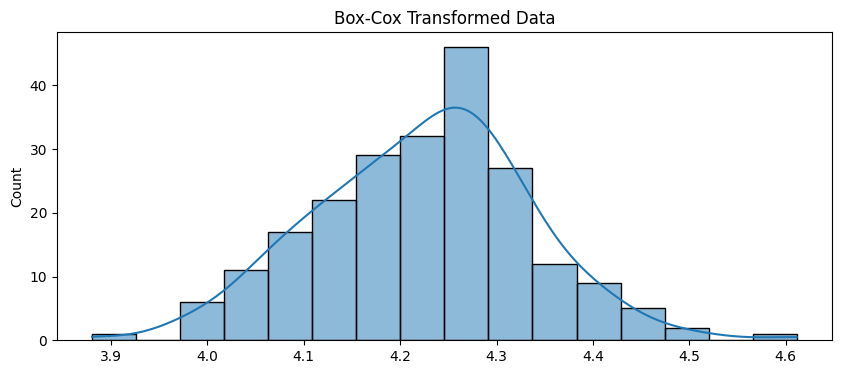

In [147]:
from scipy.stats import boxcox

boxcox_data, lambda_boxcox= boxcox(amounts)

print(lambda_boxcox)

plt.figure(figsize=(10,4))
sns.histplot(boxcox_data, kde=True)
plt.title("Box-Cox Transformed Data")
plt.show()

---
# 🔟 Z-Score & Probability Calculation
---
### 📌 Objective:
To standardize values and compute probability of large transactions.

In [148]:
mean = amounts.mean()
std = amounts.std()

ecommerce_transactions['z_score'] = (amounts - mean) / std

ecommerce_transactions[['transaction_amount','z_score']].head()

,transaction_amount,z_score
0,3821.34,0.229716
1,2781.84,-0.293776
2,4120.97,0.380609
3,6383.78,1.520159
4,2651.61,-0.359360


In [149]:
from scipy.stats import norm
prob_5000 = 1 - norm.cdf(5000, mean, std) # cdf calculates from 0 to 5000 and if we subtract it from 1 we get probability of >5000.

print("Probability(Transaction > 5000):", prob_5000)

Probability(Transaction > 5000): 0.20517209567554384


### 📈 Distribution Visualization

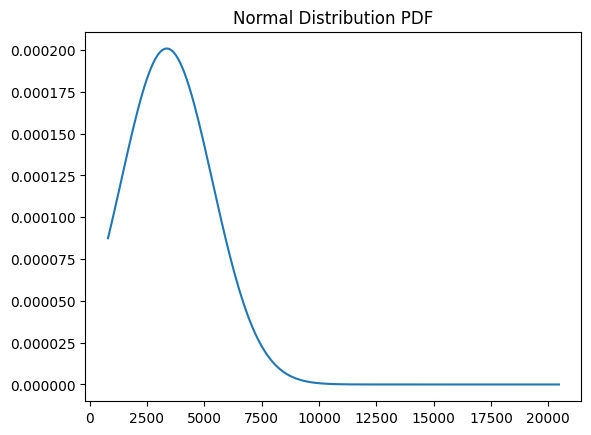

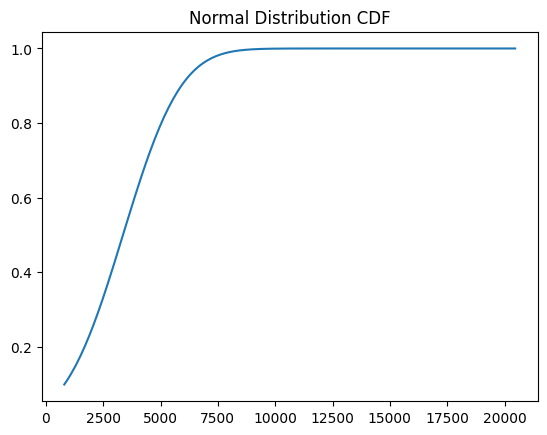

In [150]:
x = np.linspace(amounts.min(), amounts.max(), 200)

pdf = norm.pdf(x, mean, std)
plt.figure()
plt.plot(x, pdf)
plt.title("Normal Distribution PDF")
plt.show()

cdf = norm.cdf(x, mean, std)
plt.figure()
plt.plot(x, cdf)
plt.title("Normal Distribution CDF")
plt.show()

The smooth curve represents the theoretical probability distribution 
fitted to the actual transaction data.

## short summary

##### 

After analyzing the dataset, we can clearly see different statistical behaviors in different parts of the transactions.

First, the transaction status (Success/Fail) behaves like a **Bernoulli distribution** because each transaction has only two possible outcomes. When we group these transactions weekly per customer, the pattern resembles a **Binomial distribution**, since we are counting how many successful transactions occur within a fixed period.

When we looked at the number of transactions happening each day, the data closely followed a **Poisson distribution**. This makes sense because transactions occur randomly and independently over time, which is exactly what Poisson models are designed for.

The most interesting part was the transaction amount. The data was clearly **right-skewed**, meaning most transactions are small or moderate, while a few are very large. The Q-Q plot confirmed that the amounts do not follow a normal distribution. Instead, they are better described by a **Log-Normal or Pareto (Power Law) distribution**, showing heavy-tailed behavior. This indicates that a small number of high-value transactions significantly impact overall revenue.

After applying the **Box-Cox transformation**, the data became more normally distributed, which makes it more suitable for regression and predictive modeling.

Overall, transaction frequency behaves like a random arrival process, transaction outcomes behave like independent probability trials, and transaction amounts follow a skewed heavy-tailed pattern. This gives us a strong statistical understanding of how the e-commerce system behaves in real-world conditions.
